In [39]:
import os
os.chdir('/home/khalyl/code/KhalylDammas/neo-hazardous-classification')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from neo.params import *
from neo.ml_logic import data

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv(DATA_LOCAL_PATH)
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
# Data cleaning...
df = data.clean_data(df)
# Data pre-processing
df = data.preprocessing(df)

In [18]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']

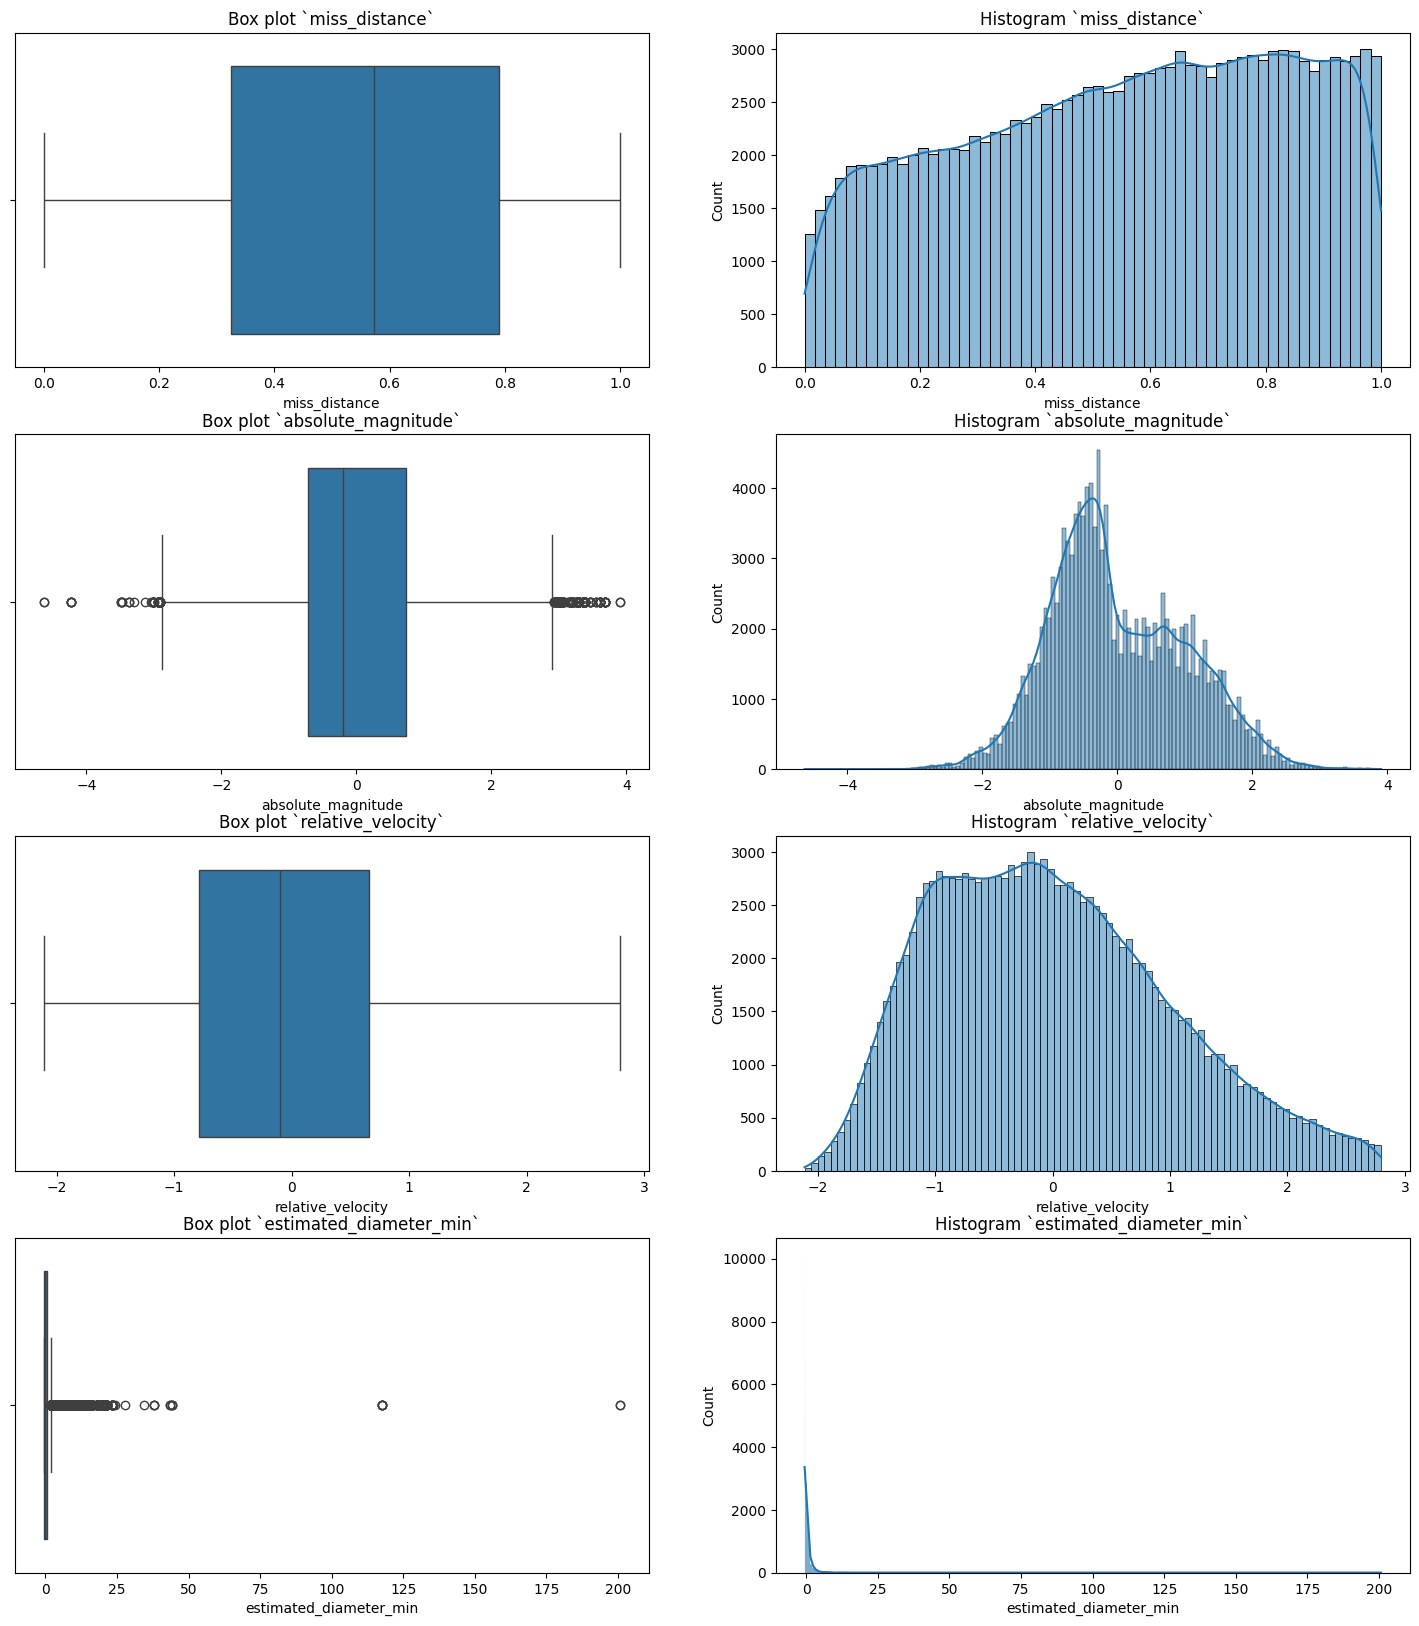

In [5]:
cols = list(X.columns)
n_rows = len(cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(18, 20))

for i in range(n_rows):
    # Box plot
    sns.boxplot(data=X, x=cols[i], ax=axes[i, 0])
    axes[i, 0].set_title(f"Box plot `{cols[i]}`")
    # Hostogram
    sns.histplot(data=X, x=cols[i], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Histogram `{cols[i]}`")


In [6]:
# print the X columns (features)
X.head()

,miss_distance,absolute_magnitude,relative_velocity,estimated_diameter_min
0,0.745995,-1.386764,2.362156,2.249460
1,0.406316,-0.639123,1.096257,0.472155
2,0.364634,-0.333748,0.238862,0.120166
3,0.935524,-0.948007,-0.204607,1.004949
4,0.075540,-0.263546,-0.593753,0.057318


In [7]:
X.describe()

,miss_distance,absolute_magnitude,relative_velocity,estimated_diameter_min
count,138173.000000,1.381730e+05,1.381730e+05,138173.000000
mean,0.550365,-1.766920e-08,-7.067680e-09,0.373355
std,0.278141,1.000004e+00,1.000004e+00,1.780732
min,0.000000,-4.633564e+00,-2.110777e+00,-0.591364
25%,0.324085,-7.128335e-01,-7.866558e-01,-0.419578
50%,0.572995,-1.933457e-01,-1.018345e-01,0.000000
75%,0.789099,7.403285e-01,6.578020e-01,0.580422
max,1.000000,3.906398e+00,2.796923e+00,200.714828


### piplene multiple models

In [14]:
pipe = Pipeline([('classifier', SVC())])

In [40]:
# Define hyperparameter grids for each model
param_grid = [
    # Logistic Regression parameters
    # {'classifier': [LogisticRegression()],
    #  'classifier__C': [0.01, 0.1, 1, 10, 100]},

    # SVM (Linear Kernel) parameters
    # {'classifier': [SVC()],
    #  'classifier__kernel': ['linear', 'rbf'],
    #  'classifier__C': [0.01, 0.1, 1, 10, 100],
    #  'classifier__gamma': ['scale', 0.001, 0.01, 0.1, 1]}#,

    {'classifier': [GradientBoostingClassifier()],
     'classifier__loss': ['log_loss'],
     'classifier__n_estimators': [100, 200, 500, 1000]},

    {'classifier': [RandomForestClassifier()],
     'classifier__criterion': ['gini', 'entropy', 'log_loss'],
     'classifier__max_features': ['sqrt', 'log2']}#,



    # K-Nearest Neighbors parameters
    # {'classifier': [KNeighborsClassifier()],
    #  'classifier__n_neighbors': [3, 5, 7, 9, 11]}
]

In [41]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=['accuracy', 'recall', 'precision'], n_jobs=18, verbose=10, refit='recall')

In [42]:
# Fit the grid search on the training data
grid_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV 1/5; 1/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=100
[CV 2/5; 1/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=100
[CV 3/5; 1/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=100
[CV 4/5; 1/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=100
[CV 5/5; 1/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=100
[CV 1/5; 2/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=200
[CV 2/5; 2/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=200
[CV 3/5; 2/10] START classifier=GradientBoostingClassifier(), classifier__loss=log_loss, classifier__n_estimators=200
[CV 4/5; 2/10] START classifier=GradientBoostingClassifi

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', SVC())]), n_jobs=18,
             param_grid=[{'classifier': [GradientBoostingClassifier()],
                          'classifier__loss': ['log_loss'],
                          'classifier__n_estimators': [100, 200, 500, 1000]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__criterion': ['gini', 'entropy',
                                                    'log_loss'],
                          'classifier__max_features': ['sqrt', 'log2']}],
             refit='recall', scoring=['accuracy', 'recall', 'precision'],
             verbose=10)

In [45]:
grid_search.best_score_

np.float64(0.8221785245646196)

In [46]:
# Print the best parameters and the best accuracy score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'classifier': GradientBoostingClassifier(), 'classifier__loss': 'log_loss', 'classifier__n_estimators': 500}


In [23]:
from sklearn import config_context

'1.5.2'

In [24]:
# best_estimator = grid_search.best_estimator_

In [49]:
best_estimator.named_steps['classifier'] #SVC (C=100, gamma=1, kernel='rbf')

SVC(C=100, gamma=1)

In [22]:
# Evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best model accuracy on the test set: {accuracy:.4f}')

NameError: name 'X_test' is not defined

### another way for piplene multiple models

In [ ]:
pipe = Pipeline([('scaled' , MinMaxScaler()),
                 ('LR' ,LogisticRegression())])
pipe.fit(X_train ,y_train)
print(accuracy_score(y_test, pipe.predict(X_test)))

In [ ]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , MinMaxScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , MinMaxScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , MinMaxScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , MinMaxScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , MinMaxScaler()),('MNB' ,GaussianNB())]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)

In [ ]:
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()